In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
import alignment as al
import numpy as np
import tifffile as tiff
import math

import PIL.Image
from cStringIO import StringIO
import IPython.display
import numpy as np
def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

In [3]:
# Expand along the channel dimension
train_stack = np.expand_dims(tiff.imread('./isbi/train-input.tif'), axis=3)

In [4]:
tf.reset_default_graph()

In [5]:
rot = True
max_angle = math.pi/10
trans = True
max_shift = 25
lsamp = al.LocalizationSampler(train_stack, rotation_aug=rot, max_angle=max_angle, translation_aug=trans,
                               max_shift=max_shift)

In [6]:
with tf.Session() as sess:
    ref_op, sec_op, true_sec_op = lsamp.get_sample_funcs()
    
    ref_op = tf.cast(ref_op, dtype=tf.float32) / 255.0
    sec_op = tf.cast(sec_op, dtype=tf.float32) / 255.0
    true_sec_op = tf.cast(true_sec_op, dtype=tf.float32) / 255.0
    
    print(ref_op.get_shape())
    print(sec_op.get_shape())
    print(true_sec_op.get_shape())
    
    aff_trans = al.AffineSpatialTransformer(774)
    
    trans_op = aff_trans(ref_op, sec_op)
#     tf_padded = tf.constant(padded / 255.0, dtype=tf.float32)
#     trans2 = al.transformer_layer(tf_padded, mode='AFFINE')
    # afftrans = al.AffineSpatialTransformer()
    sess.run(tf.global_variables_initializer())
#     res = sess.run(trans2)
    res, ref, sec, tsec = sess.run([trans_op, ref_op, sec_op, true_sec_op])

(1, 774, 774, 1)
(1, 774, 774, 1)
(1, 774, 774, 1)
387
193
97
49
(1, 2, 387, 387, 24)
(1, 2, 193, 193, 36)
(1, 2, 97, 97, 48)
(1, 2, 49, 49, 64)


In [7]:
res.shape

(774, 774)

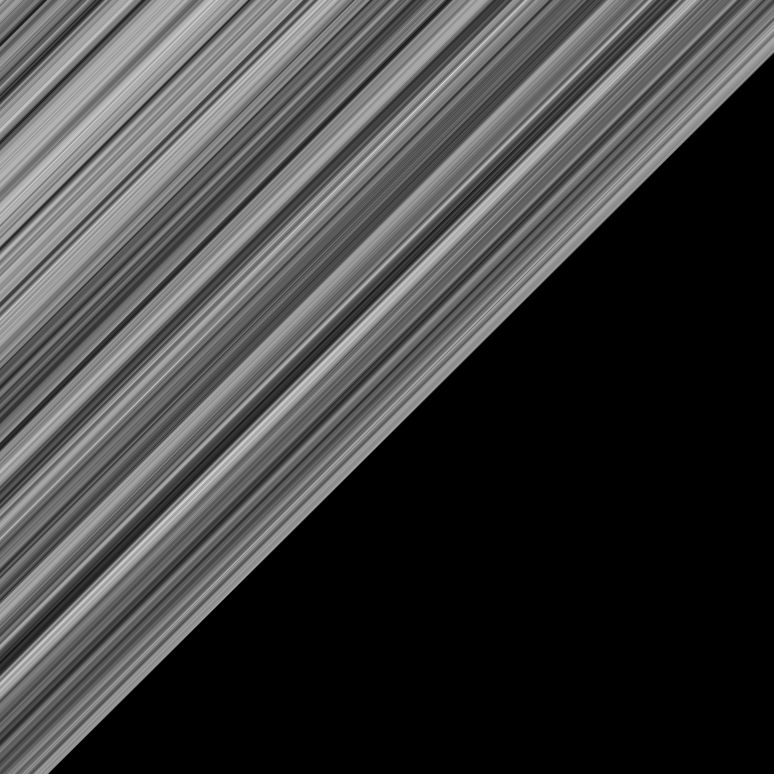

In [9]:
showarray(res[:,:]*255)

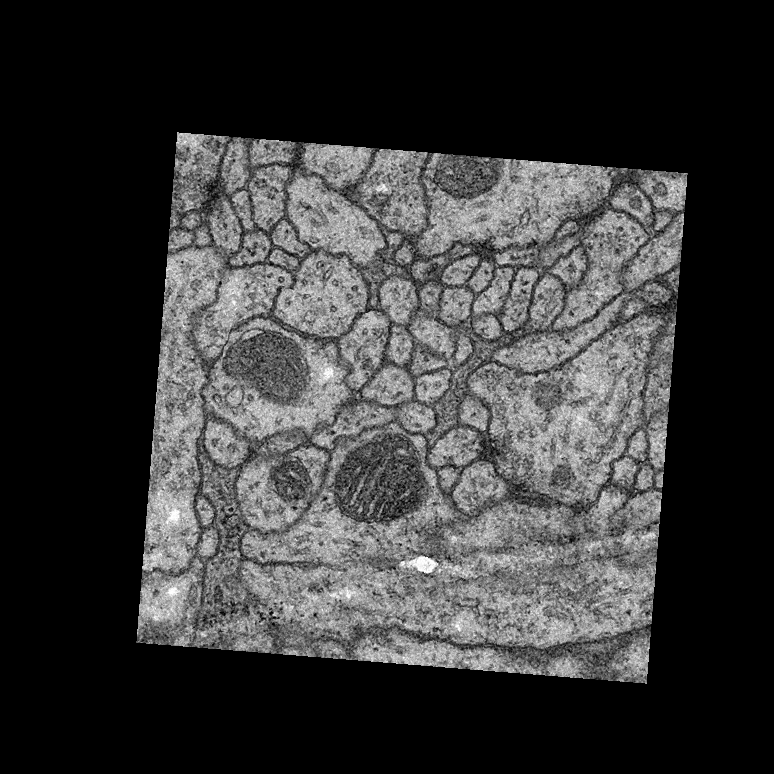

In [13]:
showarray(sec[0,:,:,0] * 255)

In [29]:
tf.reset_default_graph()
train_stack = np.expand_dims(tiff.imread('./isbi/train-input.tif'), axis=3) / 255.0
dim = int(train_stack.shape[1] * (math.sqrt(2)) + 100)
aff_trans = al.AffineSpatialTransformer(dim)
trainer = al.LocalizationTrainer(aff_trans, './realignment/spatial_transformer/affine/test/')

412
206
103
52


In [30]:
with tf.Session() as sess:
    trainer.train(sess, train_stack, 101)

(1, 2, 412, 412, 24)
(1, 2, 206, 206, 36)
(1, 2, 103, 103, 48)
(1, 2, 52, 52, 64)
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


Step 0
Computed images
Model saved in ./realignment/spatial_transformer/affine/test/model.ckpt
Step 10
Step 20
Step 30
Step 40
Step 50
Step 60
Step 70
Step 80
Step 90
Step 100
Computed images
